In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import math


import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
probes = ['probeC', 'probeD', 'probeF', 'probeE', 'probeB', 'probeA']
names = ['V1', 'LM','RL', 'AL','PM', 'AM']
probe_colors = np.array([[0.34648212, 0.54925029, 0.7527105 ],
                         [0.64098424, 0.82729719, 0.90080738],
                         [0.66180315, 0.71585928, 0.911188  ], 
                         [0.91530181, 0.91530181, 0.61530181],
                         [0.98731257, 0.6473664 , 0.36424452],
                         [0.8899654 , 0.28673587, 0.19815456]])

num_states = 3
state_names = ['High frequency', 'Intermediate', 'Low frequency']
short_state_names = [r"$S_{H}$", r"$S_{I}$", r"$S_{L}$"]
state_colors = ['tab:green', 'tab:blue', 'mediumvioletred']
stim = 'natural_movie_one_more_repeats'

sessions = [767871931, 771990200, 778240327, 778998620, 786091066,
            794812542, 831882777, 839068429, 847657808, 840012044,
            766640955, 768515987, 771160300, 774875821, 779839471,
            781842082, 787025148, 789848216, 793224716, 816200189,
            819186360, 819701982, 821695405, 829720705, 835479236]
path = '../data/HMM_predictor/'

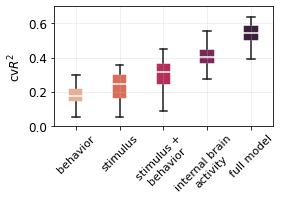

In [3]:
df = pd.DataFrame()
temp_df = pd.DataFrame()
temp_df['$r^2$'] =  np.nanmean(np.load( path + '/behavior_model/population_model/r2_behavior_final_' + stim + '_4.npy'), axis = 1)
temp_df['feature'] = 'behavior'
df = df.append(temp_df, ignore_index = True)

temp_df = pd.DataFrame()
temp_df['$r^2$'] = np.nanmean(np.load(path + '/stim_model/population_model/r2_stim_final_' + stim + '_2.npy'), axis = 1)
temp_df['feature'] = 'stimulus'
df = df.append(temp_df, ignore_index = True)

temp_df = pd.DataFrame()
temp_df['$r^2$'] = np.nanmean(np.load(path + '/stim_behavior_model/population_model/r2_stim_behavior_final_' + stim + '_4.npy'), axis = 1)
temp_df['feature'] = 'stimulus +\nbehavior'
df = df.append(temp_df, ignore_index = True)


temp_df = pd.DataFrame()
temp_df['$r^2$'] = np.nanmean(np.load(path + '/internal_activity_model/population_model/r2_state_final_' + stim + '_4.npy'), axis = 1)
temp_df['feature'] = 'internal brain\nactivity'
df = df.append(temp_df, ignore_index = True)

temp_df = pd.DataFrame()
temp_df['$r^2$'] = np.nanmean(np.load(path + '/full_model/population_model/r2_fullmodel_final_' + stim + '_4.npy'), axis = 1)
temp_df['feature'] = 'full model'
df = df.append(temp_df, ignore_index = True)


fig, ax = plt.subplots(figsize = (4, 3))
sns.boxplot(x = 'feature', y = '$r^2$', data = df, width = 0.35, 
            palette = 'rocket_r', fliersize = 0, medianprops={"color": "w"}, 
            boxprops = {"edgecolor" : 'w'})
plt.ylim(0, 0.7)
plt.yticks([0, 0.2, 0.4, 0.6], fontsize = 12)
plt.xticks(fontsize = 12, rotation = 45)
plt.ylabel('cv$R^2$', fontsize = 12)
plt.xlabel('')
plt.grid(True, color = 'silver', alpha = 0.3)
plt.xticks(fontsize = 11)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.tight_layout()

-----------
F_onewayResult(statistic=23.090857456979506, pvalue=8.036616653719396e-06)
-----------
-----------
F_onewayResult(statistic=26.271075401967465, pvalue=2.3435270850381775e-06)
-----------


C:\Users\shailaja.akella\Anaconda3\envs\allensdk\lib\site-packages\ipykernel_launcher.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


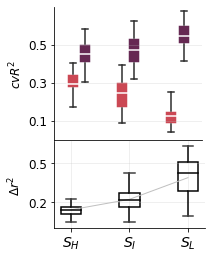

In [4]:
fig, ax = plt.subplots(figsize =(3, 2.2))

stim = 'natural_movie_one_more_repeats'
r2_nostates = np.load(path + '/stim_behavior_model/population_model/r2_stim_behavior_' + stim + '_4.npy')

r2_states = np.load(path + '/full_model/population_model/r2_fullmodel_' + stim + '_4.npy')

c = sns.color_palette("rocket_r")
df = pd.DataFrame()
for s_no in range(3):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  np.nanmean(r2_nostates, axis = 1)[:, s_no]
    temp_df['state'] = short_state_names[s_no]
    temp_df['feature'] = 'stimulus +\nbehavior'
    df = df.append(temp_df, ignore_index = True)

for s_no in range(3):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  np.nanmean(r2_states, axis = 1)[:, s_no]
    temp_df['state'] = short_state_names[s_no]
    temp_df['feature'] = 'full model'
    df = df.append(temp_df, ignore_index = True)
    
sns.boxplot(x = 'state',  y = '$r^2$', hue = 'feature', data = df,
        palette = [c[2], c[4]],  width = 0.5, fliersize =0, 
            medianprops={"color": "w"}, 
            boxprops = {"edgecolor" : 'w'})
plt.ylabel('$cvR^2$', fontsize = 12)
plt.xlabel('')
plt.grid(True, color = 'silver', alpha = 0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.legend([],[], frameon=False)
plt.xticks([])

plt.yticks(np.arange(0.1, 0.7, 0.2), fontsize = 12)
plt.ylim(0, 0.7)
a = df[(df['state'] == short_state_names[0]) & ((df['feature'] ==  'stimulus +\nbehavior'))]['$r^2$'].values
b = df[(df['state'] == short_state_names[0]) & ((df['feature'] ==  'full model'))]['$r^2$'].values

x1 = df[(df['state'] == short_state_names[2]) & ((df['feature'] ==  'stimulus +\nbehavior'))]['$r^2$'].values
x2 = df[(df['state'] != short_state_names[2]) & ((df['feature'] ==  'stimulus +\nbehavior'))]['$r^2$'].values
print('-----------')
print(f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]))
print('-----------')

ax2 = fig.add_axes([0.263, -0.468, 0.7, 0.55]) 
del_r2 = np.nanmean(np.nanmean(r2_states, axis = 1) - np.nanmean(r2_nostates, axis = 1), axis = 0)
error = np.nanstd(np.nanmean(r2_states, axis = 1) - np.nanmean(r2_nostates, axis = 1), axis = 0)

df = pd.DataFrame()
for s_no in range(3):
    temp_df = pd.DataFrame()
    temp_df['$\Delta r^{2}$'] =  (np.nanmean(r2_states, axis = 1) - np.nanmean(r2_nostates, axis = 1))[:, s_no]
    temp_df['state'] = short_state_names[s_no]
    df = df.append(temp_df, ignore_index = True)

sns.boxplot(x = 'state', y = '$\Delta r^{2}$', data = df, ax = ax2, width = 0.35,
            medianprops = {'color': 'k'}, fliersize = 0, whiskerprops = {'color': 'k'}, 
            boxprops = {'facecolor': 'w','edgecolor':'k'})   
ax2.plot(short_state_names, del_r2,  lw = 1, color = 'silver')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.tick_params(labelsize=12)
ax2.set_yticks([0.2, 0.5])
ax2.set_ylim(0,0.67)
ax2.set_ylabel(r"$\Delta r^{2}$", fontsize = 12)
plt.xticks(fontsize = 14)
plt.xlabel('')
plt.grid(True, color = 'silver', alpha = 0.3)
plt.tight_layout()

# check p-vals
p = np.ones((num_states,num_states))
for s_no1 in range(num_states):
    for s_no2 in range(s_no1, num_states):
        x1 = np.nanmean(r2_states[:, :, s_no1], axis = 1) - np.nanmean(r2_nostates[:, :, s_no1], axis = 1)
        x2 = np.nanmean(r2_states[:, :, s_no2], axis = 1) - np.nanmean(r2_nostates[:, :, s_no2], axis = 1)
        F, p[s_no1, s_no2] = f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]) 
# plt.savefig(out_folder + '/brain_states_nostates.svg',  bbox_inches="tight")
# plt.savefig(out_folder + '/brain_states_nostates.pdf',  bbox_inches="tight")

x1 = df[(df['state'] == short_state_names[0])]['$\Delta r^{2}$'].values
x2 = df[(df['state'] != short_state_names[0])]['$\Delta r^{2}$'].values
print('-----------')
print(f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]))
print('-----------')


C:\Users\shailaja.akella\Anaconda3\envs\allensdk\lib\site-packages\ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


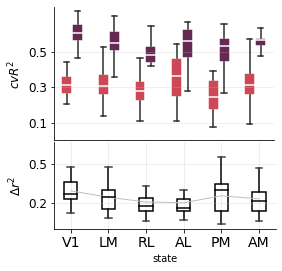

In [5]:
fig, ax = plt.subplots(figsize =(4, 2.2))
stim = 'natural_movie_one_more_repeats'
r2_nostates = np.load(path + '/stim_behavior_model/population_model/r2_stim_behavior_final_' + stim + '_4.npy')

r2_states = np.load(path + '/full_model/population_model/r2_fullmodel_final_' + stim + '_4.npy')

df = pd.DataFrame()
for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  r2_nostates[:, p_no]
    temp_df['state'] = names[p_no]
    temp_df['feature'] = 'stimulus +\nbehavior'
    df = df.append(temp_df, ignore_index = True)

for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  r2_states[:, p_no]
    temp_df['state'] = names[p_no]
    temp_df['feature'] = 'full model'
    df = df.append(temp_df, ignore_index = True)
    
sns.boxplot(x = 'state',  y = '$r^2$', hue = 'feature', data = df,
        palette = [c[2], c[4]],  width = 0.6, fliersize =0, 
            medianprops={"color": "w"}, 
            boxprops = {"edgecolor" : 'w'})
plt.ylabel('$cvR^2$', fontsize = 12)
plt.xlabel('')
plt.grid(True, color = 'silver', alpha = 0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.legend([],[], frameon=False)
plt.yticks(np.arange(0.1, 0.7, 0.2), fontsize = 12)
plt.ylim(0, 0.75)
plt.xticks([])

ax2 = fig.add_axes([0.2, -0.468, 0.77, 0.55]) 
del_r2 = np.nanmean(r2_states - r2_nostates, axis = 0)
error = np.nanstd(r2_states - r2_nostates, axis = 0)

df = pd.DataFrame()
for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$\Delta r^{2}$'] =  (r2_states - r2_nostates)[:, p_no]
    temp_df['state'] = names[p_no]
    df = df.append(temp_df, ignore_index = True)

sns.boxplot(x = 'state', y = '$\Delta r^{2}$', data = df, ax = ax2, width = 0.35,
            medianprops = {'color': 'k'}, fliersize = 0, whiskerprops = {'color': 'k'}, 
            boxprops = {'facecolor': 'w','edgecolor':'k'})  
ax2.plot(names, del_r2,  lw = 1, color = 'silver')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.tick_params(labelsize=12)
ax2.set_ylim(0, 0.67)
ax2.set_yticks([0.2, 0.5])
plt.grid(True, color = 'silver', alpha = 0.3)
ax2.set_ylabel(r"$\Delta r^{2}$", fontsize = 12)
plt.xticks(fontsize = 14)
plt.tight_layout()

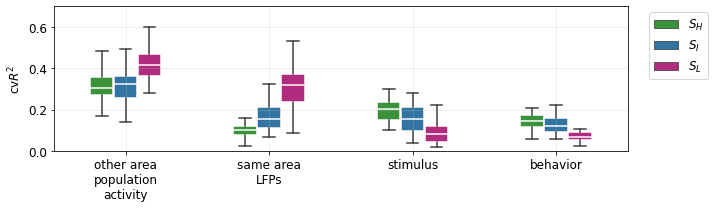

In [6]:
stim = 'natural_movie_one_more_repeats'


r2_pop = np.load(path + 'pop_model/population_model/r2_pop_' + stim + '_4.npy')
df = pd.DataFrame()
for s_no in range(3):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  np.nanmean(r2_pop, axis = 1)[:, s_no]
    temp_df['state'] = short_state_names[s_no]
    temp_df['feature'] = 'other area\npopulation\nactivity'
    df = df.append(temp_df, ignore_index = True)
    
r2_lfp = np.load(path + 'LFP_model/population_model/r2_LFPs_' + stim + '_4.npy')

for s_no in range(3):
    temp_df = pd.DataFrame()
    x = np.nanmean(r2_lfp, axis = 1)[:, s_no]
    temp_df['$r^2$'] = x[x > 0]
    temp_df['state'] = short_state_names[s_no]
    temp_df['feature'] = 'same area\nLFPs'
    df = df.append(temp_df, ignore_index = True)

r2_stim = np.load(path + '/stim_model/population_model/r2_stim_' + stim + '_2.npy')

for s_no in range(3):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  np.nanmean(r2_stim, axis = 1)[:, s_no]
    temp_df['state'] = short_state_names[s_no]
    temp_df['feature'] = 'stimulus'
    df = df.append(temp_df, ignore_index = True)

r2_b = np.load(path + 'behavior_model/population_model/r2_behavior_' + stim + '_4.npy')

for s_no in range(3):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  np.nanmean(r2_b, axis = 1)[:, s_no]
    temp_df['state'] = short_state_names[s_no]
    temp_df['feature'] = 'behavior'
    df = df.append(temp_df, ignore_index = True)
    
fig, ax = plt.subplots(figsize = (10, 3))
sns.boxplot(x = 'feature', y = '$r^2$', hue = 'state', data = df, width = 0.5, 
            palette = state_colors, fliersize = 0,  medianprops={"color": "w"}, 
            boxprops = {"edgecolor" : 'w'})
plt.ylim(0, 0.7)
plt.yticks([0, 0.2, 0.4, 0.6], fontsize = 12)
plt.ylabel('cv$R^2$', fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('')
plt.grid(True, zorder = 0,alpha= 0.3, color = 'silver')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.legend(bbox_to_anchor = (1.15, 1), fontsize = 12) 
plt.tight_layout()

_, p = f_oneway(df[(df['feature'] ==  'stimulus') & (df['state'] == short_state_names[0])]['$r^2$'].values, 
               df[(df['feature'] ==  'stimulus') & (df['state'] != short_state_names[0])]['$r^2$'].values,) 


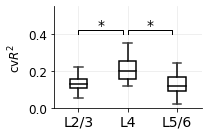

In [7]:
stim = 'natural_movie_one_more_repeats'
df = pd.DataFrame()
temp_df = pd.DataFrame()
temp_df['$r^2$'] =  np.nanmean(np.load(path + 'LFP_model/population_model/r2_L23_LFPs_final_' + stim + '_2.npy'), axis = 1)
temp_df['feature'] = 'L2/3'
df = df.append(temp_df, ignore_index = True)

temp_df = pd.DataFrame()
temp_df['$r^2$'] =  np.nanmean(np.load(path + 'LFP_model/population_model/r2_L4_LFPs_final_' + stim + '_2.npy'), axis = 1)
temp_df['feature'] = 'L4'
df = df.append(temp_df, ignore_index = True)

temp_df = pd.DataFrame()
temp_df['$r^2$'] =  np.nanmean(np.load(path + 'LFP_model/population_model/r2_L56_LFPs_final_' + stim + '_2.npy'), axis = 1)
temp_df['feature'] = 'L5/6'
df = df.append(temp_df, ignore_index = True)

fig, ax = plt.subplots(figsize = (3, 2))
sns.boxplot(x = 'feature', y = '$r^2$', data = df, width = 0.35, 
            fliersize = 0, medianprops = {'color': 'k'}, 
            boxprops = {'facecolor': 'w', 'edgecolor': 'k'}, whiskerprops = {'color': 'k'})

p = np.zeros((3, 3))
F, p[0, 1] = f_oneway(df['$r^2$'][df['feature'] == 'L2/3'], df['$r^2$'][df['feature'] == 'L4']) 
F, p[0, 2] = f_oneway(df['$r^2$'][df['feature'] == 'L2/3'], df['$r^2$'][df['feature'] == 'L5/6']) 
F, p[1, 2] = f_oneway(df['$r^2$'][df['feature'] == 'L4'], df['$r^2$'][df['feature'] == 'L5/6']) 
for b_no1 in range(3):
    for b_no2 in range(b_no1+1, 3):
        x1, x2 = b_no1, b_no2 - 0.1
        y, h = 0.45 - np.mod(b_no1 + b_no2, 2)*0.05 , 0.02
        if p[b_no1, b_no2] < 0.05/3:
            plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, color ='k')
        if p[b_no1, b_no2] < 0.0001/3:
            plt.text((x1+x2)*.5, y + 0.01, "***", ha='center', va='bottom', fontsize = 14)
        elif p[b_no1, b_no2] < 0.001/3:
            plt.text((x1+x2)*.5, y + 0.01, "**", ha='center', va='bottom', fontsize = 14)
        elif p[b_no1, b_no2] < 0.05/3:
            plt.text((x1+x2)*.5, y + 0.01, "*", ha='center', va='bottom', fontsize = 14)
            
plt.yticks([0, 0.2, 0.4], fontsize = 12)
plt.ylim(0, 0.55)
plt.xticks(fontsize = 12)
plt.ylabel('cv$R^2$', fontsize = 12)
plt.xlabel('')
plt.grid(True, color = 'silver', alpha = 0.3)
plt.xticks(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.tight_layout()

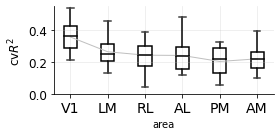

In [8]:
r2_lfp = np.load(path + 'LFP_model/population_model/r2_LFPs_final_' + stim + '_2.npy')

df = pd.DataFrame()
for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  r2_lfp[:, p_no]
    temp_df['area'] = names[p_no]
    df = df.append(temp_df, ignore_index = True)

fig, ax = plt.subplots(figsize = (4, 2))
sns.boxplot(x = 'area', y = '$r^2$', data =  df,
            width = 0.35, fliersize = 0, medianprops = {'color': 'k'}, 
            boxprops = {'facecolor': 'w', 'edgecolor': 'k'}, whiskerprops = {'color': 'k'})
ax.plot(names, np.nanmean(r2_lfp, axis = 0),  lw = 1, color = 'silver')
plt.yticks([0, 0.2, 0.4], fontsize = 12)
plt.ylim(0, 0.55)
plt.ylabel('cv$R^2$', fontsize = 12)
plt.xticks(fontsize = 14)
plt.grid(True, color = 'silver', alpha = 0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.tight_layout()

0.6108177315243564, 0.06919468612207462
0.5495806243819922, 0.09162407357241224
0.4744106311742301, 0.08592960565053114
0.5363100804704626, 0.11245717874538931
0.5009360070846219, 0.12052014439556737
0.5503589215113485, 0.06821214757633692
[ True False  True False False False]
[False False  True False False  True]
[ True False False False False False]
[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]
[False False False False False False]


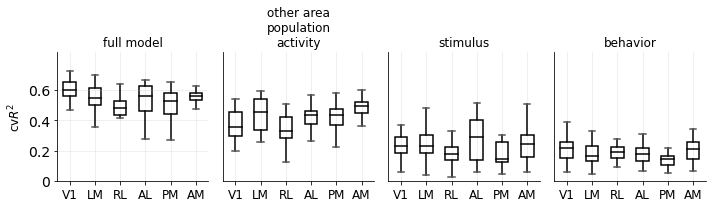

In [11]:
stim = 'natural_movie_one_more_repeats'

r2_full = np.load(path + '/full_model/population_model/r2_fullmodel_final_' + stim + '_4.npy')
df = pd.DataFrame()
for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  r2_full[:, p_no]
    print(np.nanmean(temp_df['$r^2$']), end = ', ')
    print(np.nanstd(temp_df['$r^2$']))
    temp_df['area'] = names[p_no]
    temp_df['feature'] = 'full model'
    df = df.append(temp_df, ignore_index = True)
    
# check p-vals
p  = np.ones((6))
for p_no in range(6):
    x1 = r2_full[:, p_no]
    r = list(set(np.arange(6)) - set([p_no]))
    x2 = r2_full[:, r].reshape(-1)
    F, p[p_no] = f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]) 
    
print(p < 0.05/5)

r2_pop = np.load(path + 'pop_model/population_model/r2_pop_final_' + stim + '_4.npy')
for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  r2_pop[:, p_no]
    temp_df['area'] = names[p_no]
    temp_df['feature'] = 'other area\npopulation\nactivity'
    df = df.append(temp_df, ignore_index = True)
    
# check p-vals
p  = np.ones((6))
for p_no in range(6):
    x1 = r2_pop[:, p_no]
    r = list(set(np.arange(6)) - set([p_no]))
    x2 = r2_pop[:, r].reshape(-1)
    F, p[p_no] = f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]) 
    
print(p < 0.05/5)

r2_lfp = np.load(path + 'LFP_model/population_model/r2_LFPs_final_' + stim + '_4.npy')


for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  r2_lfp[:, p_no]
    temp_df['area'] = names[p_no]
    temp_df['feature'] = 'same area\nLFPs'
    df = df.append(temp_df, ignore_index = True)
    
# check p-vals
p  = np.ones((6))
for p_no in range(6):
    x1 = r2_lfp[:, p_no]
    r = list(set(np.arange(6)) - set([p_no]))
    x2 = r2_lfp[:, r].reshape(-1)
    F, p[p_no] = f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]) 
    
print(p < 0.05/5)
    
r2_stim = np.load(path + 'stim_model/population_model/r2_stim_final_' + stim + '_2.npy')

for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  r2_stim[:, p_no]
    temp_df['area'] = names[p_no]
    temp_df['feature'] = 'stimulus'
    df = df.append(temp_df, ignore_index = True)
    
# check p-vals
p  = np.ones((6))
for p_no in range(6):
    x1 = r2_stim[:, p_no]
    r = list(set(np.arange(6)) - set([p_no]))
    x2 = r2_stim[:, r].reshape(-1)
    F, p[p_no] = f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]) 
    
    
p1  = np.ones((6, 6))
for p_no1 in range(6):
    for p_no2 in range(p_no1+1, 6):
        x1 = r2_stim[:, p_no1]
        x2 = r2_stim[:, p_no2]
        F, p1[p_no1, p_no2] = f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]) 
    
print(p1 < 0.05/5)

r2_b =np.load(path + '/behavior_model/population_model/r2_behavior_final_' + stim + '_4.npy')

for p_no in range(6):
    temp_df = pd.DataFrame()
    temp_df['$r^2$'] =  r2_b[:, p_no]
    temp_df['area'] = names[p_no]
    temp_df['feature'] = 'behavior'
    df = df.append(temp_df, ignore_index = True)

# check p-vals
p  = np.ones((6))
for p_no in range(6):
    x1 = r2_b[:, p_no]
    r = list(set(np.arange(6)) - set([p_no]))
    x2 = r2_b[:, r].reshape(-1)
    F, p[p_no] = f_oneway(x1[~np.isnan(x1)], x2[~np.isnan(x2)]) 
    
print(p < 0.05/5)

keys = ['full model', 'other area\npopulation\nactivity', 'stimulus', 'behavior']
fig, ax = plt.subplots(1, len(keys), figsize = (10, 3))
for n, key in enumerate(keys):
    sns.boxplot(x = 'area', y = '$r^2$',  data = df[df['feature'] == key], ax = ax[n],
                palette = probe_colors, width = 0.5, fliersize =0, 
                medianprops = {'color': 'k'}, 
                boxprops = {'facecolor': 'w', 'edgecolor': 'k'}, whiskerprops = {'color': 'k'})
    ax[n].set_ylim(0, 0.85)
    ax[n].set_yticks([])
    ax[n].set_xticks(np.arange(6), labels = names, fontsize = 12)
    ax[n].set_xlabel('')
    ax[n].set_ylabel('')
    ax[n].grid(True, zorder = 0,alpha= 0.3, color = 'silver')
    ax[n].spines['top'].set_visible(False)
    ax[n].spines['right'].set_visible(False)
    ax[n].spines['bottom'].set_visible(True)
    if n == 0:
        ax[n].spines['left'].set_visible(True)
    else:
        ax[n].spines['left'].set_visible(False)
    ax[n].spines['left'].set_visible(True)
    ax[n].set_title(key)
ax[0].set_yticks([0, 0.2, 0.4, 0.6], labels = [0, 0.2, 0.4, 0.6], fontsize = 14)
ax[0].set_ylabel('cv$R^2$', fontsize = 12)
plt.tight_layout()